# Lab 4-1: Multivariate Linear Regression

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Theoretical Overview

$$ H(x_1, x_2, x_3) = x_1w_1 + x_2w_2 + x_3w_3 + b $$

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W, b)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## Naive Data Representation

We will use fake data for this example.

In [4]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [5]:
# 모델 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.297 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.319497
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266215
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079390


## Matrix Data Representation

$$
\begin{pmatrix}
x_1 & x_2 & x_3
\end{pmatrix}
\cdot
\begin{pmatrix}
w_1 \\
w_2 \\
w_3 \\
\end{pmatrix}
=
\begin{pmatrix}
x_1w_1 + x_2w_2 + x_3w_3
\end{pmatrix}
$$

$$ H(X) = XW $$

In [6]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [7]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [8]:
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936096
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371071
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445267
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch   10/20 hypo

## High-level Implementation with `nn.Module`

Do you remember this model?

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

We just need to change the input dimension from 1 to 3!

In [10]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [45]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

epoch_step_fullbatch, cost_fullbatch = [], []

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))
    cost_fullbatch.append(cost.item())
    epoch_step_fullbatch.append(epoch + batch_idx / len(dataloader))

Epoch    0/20 Cost: 25699.044922
Epoch    1/20 Cost: 8056.174805
Epoch    2/20 Cost: 2526.070312
Epoch    3/20 Cost: 792.676758
Epoch    4/20 Cost: 249.348831
Epoch    5/20 Cost: 79.044289
Epoch    6/20 Cost: 25.662340
Epoch    7/20 Cost: 8.929655
Epoch    8/20 Cost: 3.684433
Epoch    9/20 Cost: 2.039982
Epoch   10/20 Cost: 1.524178
Epoch   11/20 Cost: 1.362159
Epoch   12/20 Cost: 1.311022
Epoch   13/20 Cost: 1.294624
Epoch   14/20 Cost: 1.289128
Epoch   15/20 Cost: 1.287048
Epoch   16/20 Cost: 1.286040
Epoch   17/20 Cost: 1.285397
Epoch   18/20 Cost: 1.284806
Epoch   19/20 Cost: 1.284279
Epoch   20/20 Cost: 1.283752


## PyTorch Dataset

In [46]:
from torch.utils.data import Dataset

In [47]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
    
dataset = CustomDataset()

In [48]:
from torch.utils.data import DataLoader

In [49]:
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)
# batch size 는 통상적으로 2의 제곱수로 선정

In [50]:
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)
epoch_step, cost_minibatch = [], []
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples, in enumerate(dataloader):
        x_train, y_train = samples
        # H(x)
        prediction = model(x_train)
        # cost
        cost = F.mse_loss(prediction, y_train)
        # cost 로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
                    epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))
        cost_minibatch.append(cost.item())
        epoch_step.append(epoch + batch_idx / len(dataloader))

Epoch    0/20 Batch 1/3 Cost: 8618.890625
Epoch    0/20 Batch 2/3 Cost: 3218.841064
Epoch    0/20 Batch 3/3 Cost: 1017.328308
Epoch    1/20 Batch 1/3 Cost: 281.599152
Epoch    1/20 Batch 2/3 Cost: 66.939117
Epoch    1/20 Batch 3/3 Cost: 55.596394
Epoch    2/20 Batch 1/3 Cost: 7.039517
Epoch    2/20 Batch 2/3 Cost: 6.598515
Epoch    2/20 Batch 3/3 Cost: 0.808205
Epoch    3/20 Batch 1/3 Cost: 5.893300
Epoch    3/20 Batch 2/3 Cost: 2.872247
Epoch    3/20 Batch 3/3 Cost: 0.703365
Epoch    4/20 Batch 1/3 Cost: 5.450690
Epoch    4/20 Batch 2/3 Cost: 2.115730
Epoch    4/20 Batch 3/3 Cost: 5.616154
Epoch    5/20 Batch 1/3 Cost: 3.211216
Epoch    5/20 Batch 2/3 Cost: 1.454435
Epoch    5/20 Batch 3/3 Cost: 9.924288
Epoch    6/20 Batch 1/3 Cost: 5.919242
Epoch    6/20 Batch 2/3 Cost: 1.889379
Epoch    6/20 Batch 3/3 Cost: 2.077168
Epoch    7/20 Batch 1/3 Cost: 5.701732
Epoch    7/20 Batch 2/3 Cost: 1.027708
Epoch    7/20 Batch 3/3 Cost: 4.626805
Epoch    8/20 Batch 1/3 Cost: 4.083715
Epoch    8/2

In [51]:
import matplotlib.pyplot as plt

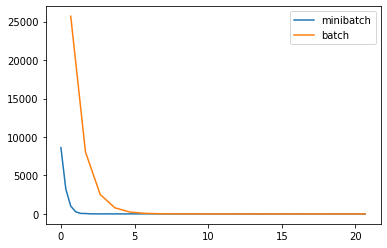

In [59]:
plt.plot(epoch_step, cost_minibatch)
plt.plot(epoch_step_fullbatch, cost_fullbatch)
plt.legend(["minibatch", "batch"])

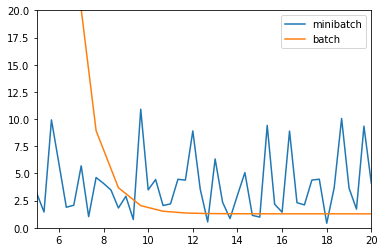

In [67]:
plt.plot(epoch_step, cost_minibatch)
plt.plot(epoch_step_fullbatch, cost_fullbatch)
plt.xlim(5,20)
plt.ylim(-0,20)
plt.legend(["minibatch", "batch"])